In [2]:
import numpy as np
import matplotlib.pyplot as plt
import solver as mysolver             # your own solver
import solution.solver_sol as solver  # compare your results with solution
from scipy.integrate import solve_ivp as solver_scipy

In [90]:
# driving force

# define y' function
def f(t, y0, K = 1, M = 1, llambda = 0.1, F_0 = 0.5, omega_f = 1.05): # gamma = lambda / 2m = 0.005
    F = -llambda * y0[1] - K * y0[0] + F_0 * np.cos(omega_f * t)
    a = F / M
    return np.array([y0[1], a])

# Prepare the input arguments
t_span = [0, 50]
t_eval = np.linspace(0, 50, 50001, endpoint=True)
K = 1
M = 1
omega_0 = K / M
llambda = 0.1
F_0 = 0.5
gamma = llambda / (2 * M)
omega = np.sqrt(np.abs(omega_0 ** 2 - gamma ** 2))
omega_f = 1.05

A = 1
phi = -np.pi / 2

try:
    delta = np.arctan(2 * gamma * omega_f / (omega_0 ** 2 - omega_f ** 2))
except ZeroDivisionError:
    delta = np.pi / 2

# D is the constant in front of the cosine term in the analytical solution
D = F_0 / (np.sqrt((omega_0 ** 2 - omega_f ** 2) ** 2 + 4 * gamma ** 2 * omega_f ** 2)) 

# calculate initial conditions
x0 = A * np.exp(-gamma * t_eval[0]) * np.cos(omega * t_eval[0] + phi) \
        + D * np.cos(omega_f * t_eval[0] - delta)

v0 = - A * np.exp(-gamma * t_eval[0]) \
        * (gamma * np.cos(omega * t_eval[0] + phi) + omega * np.sin(omega * t_eval[0] + phi)) \
        - D * omega_f * np.sin(omega_f * t_eval[0] - delta)

args = (K, M)
y0 = np.array([x0, v0])

# use the IVP solver
sol_rk4 = mysolver.solve_ivp(f, t_span, y0, method='RK4', t_eval=t_eval, args=args)

####################################################################################################

# analytical solution
x = np.zeros(len(t_eval))
v = np.zeros(len(t_eval))

x[0] = x0
v[0] = v0

sol_analytical = np.zeros((2, len(t_eval)))
sol_analytical[0, 0] = y0[0]
sol_analytical[1, 0] = y0[1]

for i in range(1, len(t_eval)):
    x[i] = A * np.exp(-gamma * t_eval[i]) * np.cos(omega * t_eval[i] + phi) \
        + D * np.cos(omega_f * t_eval[i] - delta)
    
    v[i] = - A * np.exp(-gamma * t_eval[i]) \
        * (gamma * np.cos(omega * t_eval[i] + phi) + omega * np.sin(omega * t_eval[i] + phi)) \
        - D * omega_f * np.sin(omega_f * t_eval[i] - delta)
    
    sol_analytical[0, i] = x[i]
    sol_analytical[1, i] = v[i]


In [100]:
# driving force for different omega_f

omega_f_arr = np.arange(0.5, 1.51, 0.05)
D_amp_arr = np.array([])

for x in omega_f_arr:

    # define the y' function

    def f(t, y0, K = 1, M = 1, llambda = 0.01, F_0 = 0.5, omega_f = x): # gamma = lambda / 2m = 0.005
        F = -llambda * y0[1] - K * y0[0] + F_0 * np.cos(omega_f * t)
        a = F / M
        return np.array([y0[1], a])

    # Prepare the input arguments
    t_span = [0, 50]
    t_eval = np.linspace(0, 50, 50001, endpoint=True)
    K = 1
    M = 1
    omega_0 = K / M
    llambda = 0.01
    F_0 = 0.5
    gamma = llambda / (2 * M)
    omega = np.sqrt(np.abs(omega_0 ** 2 - gamma ** 2))
    omega_f = x

    A = 1
    phi = -np.pi / 2

    try:
        delta = np.arctan(2 * gamma * omega_f / (omega_0 ** 2 - omega_f ** 2))
    except ZeroDivisionError:
        delta = np.pi / 2

    # D is the constant in front of the cosine term in the analytical solution
    D = F_0 / (np.sqrt((omega_0 ** 2 - omega_f ** 2) ** 2 + 4 * gamma ** 2 * omega_f ** 2)) 

    # calculate initial conditions
    x0 = A * np.exp(-gamma * t_eval[0]) * np.cos(omega * t_eval[0] + phi) \
            + D * np.cos(omega_f * t_eval[0] - delta)

    v0 = - A * np.exp(-gamma * t_eval[0]) \
            * (gamma * np.cos(omega * t_eval[0] + phi) + omega * np.sin(omega * t_eval[0] + phi)) \
            - D * omega_f * np.sin(omega_f * t_eval[0] - delta)

    args = (K, M)
    y0 = np.array([x0, v0])

    # use the IVP solver
    sol_rk4 = mysolver.solve_ivp(f, t_span, y0, method='RK4', t_eval=t_eval, args=args)

    ####################################################################################################

    # analytical solution
    x = np.zeros(len(t_eval))
    v = np.zeros(len(t_eval))

    x[0] = x0
    v[0] = v0

    sol_analytical = np.zeros((2, len(t_eval)))
    sol_analytical[0, 0] = y0[0]
    sol_analytical[1, 0] = y0[1]

    for i in range(1, len(t_eval)):
        x[i] = A * np.exp(-gamma * t_eval[i]) * np.cos(omega * t_eval[i] + phi) \
            + D * np.cos(omega_f * t_eval[i] - delta)
        
        v[i] = - A * np.exp(-gamma * t_eval[i]) \
            * (gamma * np.cos(omega * t_eval[i] + phi) + omega * np.sin(omega * t_eval[i] + phi)) \
            - D * omega_f * np.sin(omega_f * t_eval[i] - delta)
        
        sol_analytical[0, i] = x[i]
        sol_analytical[1, i] = v[i]

    # D_amp is the average amplitude between t=40 and t=50

    D_amp = 0

    for j in range(-10000, 0):
        D_amp += np.abs(sol_rk4[0, j]) / 10000

    D_amp_arr = np.append(D_amp_arr, D_amp)


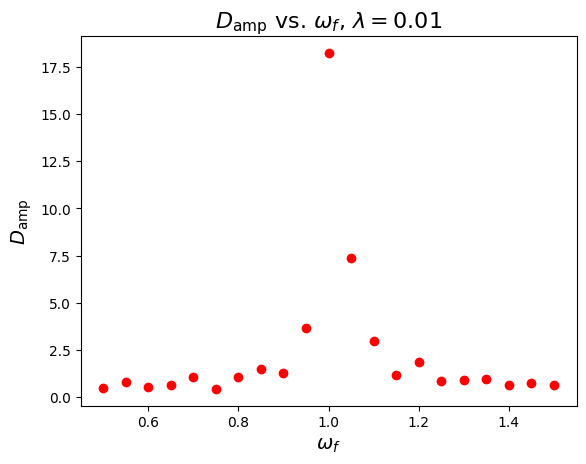

In [102]:
# plot

plt.scatter(omega_f_arr, D_amp_arr, marker='o', color='r')
plt.xlabel(r'$\omega_f$', fontsize=14)
plt.ylabel(r'$D_{\text{amp}}$', fontsize=14)
plt.title(r'$D_{\text{amp}}$ vs. $\omega_f$, $\lambda = 0.01$', fontsize=16)
# plt.savefig('D_amp_vs_omega_f_lambda_001.png')
plt.show()

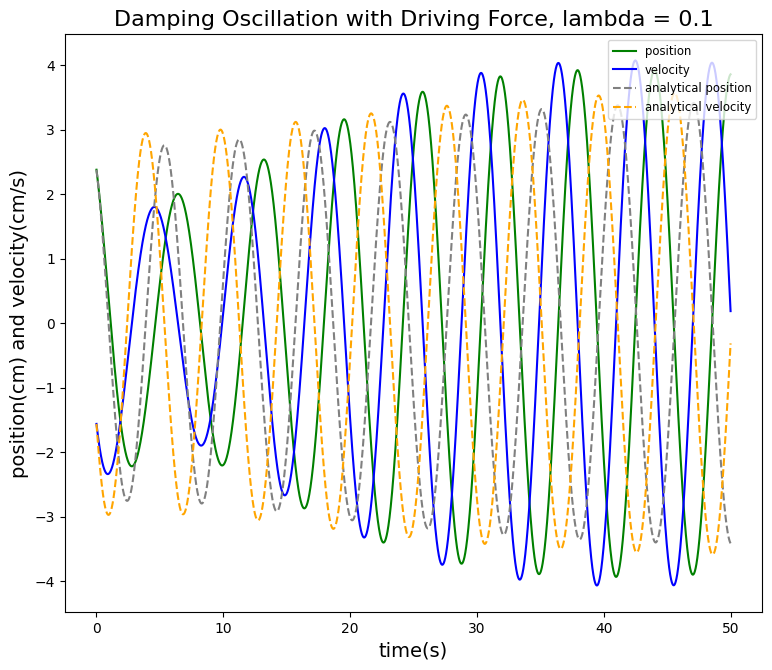

In [91]:
# plot the results

# create a larger figure
plt.figure(figsize=(9, 7.5))
plt.plot(t_eval, sol_rk4[0], label='position', color='green')
plt.plot(t_eval, sol_rk4[1], label='velocity', color='blue')
plt.plot(t_eval, sol_analytical[0], label='analytical position', color='gray', linestyle='--')
plt.plot(t_eval, sol_analytical[1], label='analytical velocity', color='orange', linestyle='--')
plt.xlabel('time(s)', fontsize=14)
plt.ylabel('position(cm) and velocity(cm/s)', fontsize=14)
# adjust the legend size and location
plt.legend(fontsize='small', loc='upper right')
plt.title(f'Damping Oscillation with Driving Force, lambda = {llambda}', fontsize=16)
# plt.savefig('driving_force.png')
plt.show()